# Fashion-MNIST Neural Network

This notebook implements a simple NN consisting of two dense layers, and uses this network to classify Fashion-MNIST images.

These Fashion-MNIST images consist of clothing items from these ten classes. (*T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)*

## Load correct version of TensorFlow

Before we use TensorFlow we must load the correct version. We want version 2.x. To do this we execute the Colab commands below. Note that these commands ONLY WORK IN COLAB.

In [1]:
# Install TensorFlow using Colab's tensorflow_version command
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass


## Import Libraries

We import TensorFlow, Numpy, and Matplotlib libraries.  

Numpy is a powerful n-dimensional array library that
allows us to easily create and manipulate arrays of data, and more!

Numpy also allows us to convert TensorFlow's native data structures,
to Python native data types.

Matplotlib is a graphics plot library

In [2]:
# Import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## Problem Statement

Using example data, train a model that will correctly predict the class of images of fashion items.



## Get Data

### About the Fashion-MNIST dataset

The Fashion-MNIST dataset is a widely available dataset.  It is documented at the https://github.com/zalandoresearch/fashion-mnist

Each image in the dataset is 28 X 28 pixels.  The pixel values are a grayscale with values ranging from 0 to 255.

Associated with each image is a number from 0 to 9 specifying the class of the fashion item in the image.  The values for the classes are:

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
|   1    | Trouser    | 
|  2     |  Pullover  |
|   3    |    Dress    |
|    4   |    Coat      |
|   5    | Sandal     |
|   6    | Shirt         |
|    7   |  Sneaker  |
|   8    |  Bag          |
|  9     | Ankle boot |

There are 60,000 Training examples and 10,000 Testing examples. 

We will need these class names later in the code.  So we create an list of names we can index by the class label number.  For example, class_names[2] = 'Pullover' and class_names[9] = 'Ankle boot'.

In [3]:
# Define class names to display
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Fashion-MNIST is one of the datasets provided with Keras in Tensorflow.  Keras' Dataset library provides a load_data() method that will download the dataset of 60,000 Training images and their corresponding 60,000 labels, and 10,000 Test images and their corresponding 10,000 labels.

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


### Explore the data

Let's look at our data.

In [5]:
# Print the shape of the data tensors we loaded.  Should be:
#   60,000 training 28X28 images and their labels, and 10,000 testing images and their labels
print ('Training data:', train_images.shape, train_labels.shape)
print ('Test data:', test_images.shape, test_labels.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


### Inspect data
Each image should be a 28 X 28 image and have a gray scale value of 0-255. Let's display an arbitrary image.

You should see:  
* A title that specifies the class of the image, whose description is shown on the table above.
* The image 
* The 28 by 28 width and height pixel index 
* and on the right the grayscale legend associated with the pixel values.

In [6]:
def show_training_image(index):
  img_label = str(train_labels[index]) + ' (' +  class_names[train_labels[index]] + ')'
  plt.figure()
  plt.title('Image Label ' + img_label) 
  plt.imshow(train_images[index], cmap='gray')  # data is grayscale, but displays in color without cmap='gray'
  plt.colorbar()
  plt.show()


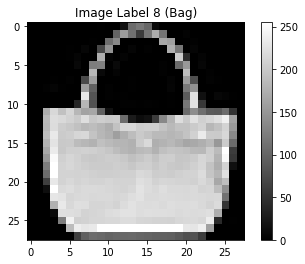

In [7]:
img_index = 100
show_training_image(img_index)

## Prepare Data

As usual we need to do some pre-processing of the data.  Here we want to scale the pixels values from 0 to 255 to 0.0 to 1.0.  We scale both the training and testing image values.

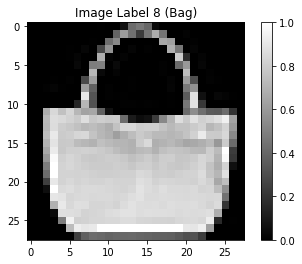

In [8]:
# scale training and testing image values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Print the image again and notice the values now range from 0 to 1.
#   And the image looks the same, just on a different scale. 
show_training_image(img_index)

## Create Model

We can now create the model we are going to train with the data.

This will be a simple model that:
* Flattens the 28 X 28 pixel values into a long stream of 28 by 28 = 784 pixel values - Note this is a Keras layer but is not a neural network layer. Notice the input_shape parameter contains only the shape of a single data element.  There are n data elements each with this same shape. 
* Passes each pixel value as the input to each of the 128 neurons.  
* And finally passes values to the last layer that contains 10 neurons, one for each of the ten classes (t-shirt, pullover, etc).  Each of these 10 neurons uses the Softmax activation function to determine the probability that the image is each class.  The final output from the model is a vector of probabilities that the image is of each class.  Such as :
[0.01, 0.05, 0.04, 0.06, 0.50, 0.20, 0.04, 0.00, 0.03, 0.07].  This example vector adds up to 1.0 and shows the probability that the image is class 0 (T-shirt/top) is 0.01 (1%), class 1 (Trousers) is 0.05 (5%), class 2 (Pullover) is 0.04 (4%), ....


In [9]:

model = tf.keras.models.Sequential()      # Create a new sequential model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))    # keras processing layer - no neurons
model.add(tf.keras.layers.Dense(128, activation='relu', name='dense-128-relu'))   # 128 neurons connected to pixels
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense-10-softmax')) # determines probability of each of the 10 classes


### Structure of the model

To make it easy for us to visualize the model, Keras models have a summary method.  When we call it we see our model structure.  

For completeness we also show the shape of the input data.


In [10]:
print('Input Shape:', train_images.shape)
print()
print(model.summary())

Input Shape: (60000, 28, 28)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense-128-relu (Dense)       (None, 128)               100480    
_________________________________________________________________
dense-10-softmax (Dense)     (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

Before we can train the model we need to specify how the model will learn from the training data.  To do this we specify:
*  loss - how we measure loss (error).  We will use sparse_categorical_crossentropy, which determines the highest predicted class and calculates loss based on how often this is the correct class.
*     optimizer - how the model will update the model's weights to reduce the loss.  We use the Adam variant of Mini-batch Gradient Descent.
* metrics  - the metrics used for evaluation of training and test.  In this case we use accuracy, that is how often the images are correctly classified.  Higher is better. (1.00 would be perfect (100%), 0,75 = 75%, 0.25 = 25%, ...) 


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


## Train the Model
Now that we have our data and model, and have specified how the model will learn from the data we can train it.

In [12]:
train_hist = model.fit(train_images, train_labels, epochs=40)

Epoch 1/40
1875/1875 [==============================] - 2s 919us/step - loss: 0.5002 - accuracy: 0.8255
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3748 - accuracy: 0.8648
Epoch 3/40
1875/1875 [==============================] - 2s 981us/step - loss: 0.3362 - accuracy: 0.8768
Epoch 4/40
1875/1875 [==============================] - 2s 951us/step - loss: 0.3126 - accuracy: 0.8848
Epoch 5/40
1875/1875 [==============================] - 2s 911us/step - loss: 0.2938 - accuracy: 0.8919
Epoch 6/40
1875/1875 [==============================] - 2s 891us/step - loss: 0.2798 - accuracy: 0.8965
Epoch 7/40
1875/1875 [==============================] - 2s 876us/step - loss: 0.2673 - accuracy: 0.9001
Epoch 8/40
1875/1875 [==============================] - 2s 881us/step - loss: 0.2578 - accuracy: 0.9044
Epoch 9/40
1875/1875 [==============================] - 2s 902us/step - loss: 0.2449 - accuracy: 0.9084
Epoch 10/40
1875/1875 [==============================] - 2s 875us/

Plot the training to makes sure it is converging.

In [13]:
def plot_acc(hist):
  # plot the accuracy
  plt.title('Accuracy History')
  plt.plot(hist.history['accuracy'])
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()
  
def plot_loss(hist):
  # plot the loss
  plt.title('Loss History')
  plt.plot(hist.history['loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.show()



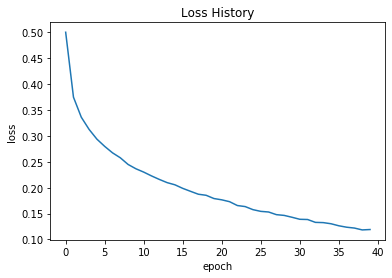

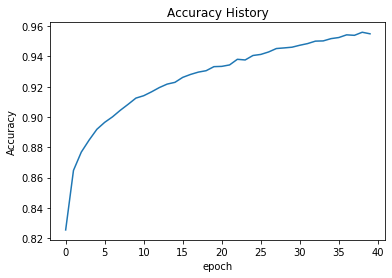

In [14]:
plot_loss(train_hist)
plot_acc(train_hist)

## Evaluate Trained Model

Once we have the model trained, we need to see how it will perform on data that it was not trained on, that is, test data. 

We do this with Keras' evaluation function and the test dataset we retrieved earlier.


In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)

print('max training accuracy:', max(train_hist.history['accuracy']), '  test accuracy:', test_acc)

max training accuracy: 0.9559166431427002   test accuracy: 0.888700008392334


## Training Results

The model has **about 96% accuracy** on the training data.  And **only 88% accuracy** on testing data on which it was not trained. This is a classic sign that the model overfits the training data.  

We need to determine how we can reduce this overfitting and get **good accuracy on both training and test data!**




# Monitoring and Improving our Trained Model’s Performance 

In this section, we want to make changes to improve the performance of our trained model.  By improved performance we mean having the model not overfit the training data and perform poorly on the testing data.

There are serveral common techniques to fix this problem.  These include:

1.   Reducing Model Complexity - removing neurons or layers
2.   Dropout - Randomly removing the contributions from some neurons
3.   Early Stopping - Terminating training as early as possible

We will try these below.



## Monitoring performance with TensorBoard

We want to ensure we are getting good data to evaluate the performance of our changes.  Fortunately the TensorFlow family include the tool **TensorBoard**.  

TensorBoard provides us various ways to monitor the performance of our models including:

*    Visualizing metrics such as loss and accuracy
*    Comparision of training and evaluation metrics
*    Visualizing the model graph (ops and layers)
*    Viewing histograms of weights, biases, or other tensors as they change over time


TensorBoard can be run inside a Colab notebook, or if you are running your code directly in Python you can invoke TensorBoard from the command line.

In [16]:
import datetime

In [19]:
# Load the tensorboard extension
%reload_ext tensorboard

In [20]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [21]:
# Start with a fresh model
model = tf.keras.models.Sequential()      # Create a new sequential model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))    # keras processing layer - no neurons
model.add(tf.keras.layers.Dense(128, activation='relu', name='dense-128-relu'))   # 128 neurons connected to pixels
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense-10-softmax')) # determine probability of each of the 10 classes

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


log_dir='logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# We add to the fit method the validation/test data.  This will cause the training model 
# to evaluate itself on the validation/test data on each epoch.  This provides per 
# epoch data points TensorBoard can plot so we can see the trend.
train_hist = model.fit(train_images, train_labels, epochs=40,
                       validation_data=(test_images, test_labels), 
                        callbacks=[tensorboard_callback])



Epoch 1/40
   1/1875 [..............................] - ETA: 0s - loss: 2.4859 - accuracy: 0.1250WARNING:tensorflow:From /Users/leoananth/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5001 - accuracy: 0.8233 - val_loss: 0.4414 - val_accuracy: 0.8361
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3769 - accuracy: 0.8636 - val_loss: 0.3831 - val_accuracy: 0.8611
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3382 - accuracy: 0.8768 - val_loss: 0.3997 - val_accuracy: 0.8563
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3154 - accuracy: 0.8845 - val_loss: 0.3858 - val_accuracy: 0.8555
Epoch 5/40
1875/1875 [==================

In [23]:
#!kill 1234   # sometime TensorBoard does not show all data.  If it shows reusing previous instance use kill command listed
%tensorboard --logdir logs/fit

## Fixing Fashion MNIST 

### Reducing Model Complexity

In a large model we can consider reducing the number of hidden layers.  But our model only has one hidden layer and we need it.  So the only thing to do is reduce the number of neurons in the hidden layer.  Everthing else is the same 
as above.

In [24]:
# Load the tensorboard extension
%reload_ext tensorboard

In [25]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [26]:

model = tf.keras.models.Sequential()      # Create a new sequential model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))    # keras processing layer - no neurons
model.add(tf.keras.layers.Dense(64, activation='relu', name='dense-64-relu'))   # 64 neurons connected to pixels
#model.add(tf.keras.layers.Dense(128, activation='relu', name='dense-128-relu'))   # 128 neurons connected to pixels
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense-10-softmax')) # determine probability of each of the 10 classes

In [27]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


log_dir= 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# We add to the fit method the validation/test data.  This will cause the training model 
# to evaluate itself on the validation/test data on each epoch.  This provides per 
# epoch data points TensorBoard can plot so we can see the trend.
train_hist = model.fit(train_images, train_labels, epochs=40,
                       validation_data=(test_images, test_labels), 
                        callbacks=[tensorboard_callback])



Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5169 - accuracy: 0.8194 - val_loss: 0.4362 - val_accuracy: 0.8489
Epoch 2/40
1875/1875 [==============================] - 2s 938us/step - loss: 0.3896 - accuracy: 0.8622 - val_loss: 0.4029 - val_accuracy: 0.8560
Epoch 3/40
1875/1875 [==============================] - 2s 935us/step - loss: 0.3510 - accuracy: 0.8735 - val_loss: 0.3923 - val_accuracy: 0.8549
Epoch 4/40
1875/1875 [==============================] - 2s 959us/step - loss: 0.3292 - accuracy: 0.8803 - val_loss: 0.3779 - val_accuracy: 0.8636
Epoch 5/40
1875/1875 [==============================] - 2s 967us/step - loss: 0.3124 - accuracy: 0.8856 - val_loss: 0.3564 - val_accuracy: 0.8693
Epoch 6/40
1875/1875 [==============================] - 2s 999us/step - loss: 0.2978 - accuracy: 0.8908 - val_loss: 0.3588 - val_accuracy: 0.8770
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2880 - accuracy: 0.8923 - val_loss: 0.3660 - val

Show the results with TensorBoard

In [28]:
#!kill 1234   # sometime TensorBoard does not show all data.  If it shows reusing previous instance use kill command listed
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 27511), started 0:03:22 ago. (Use '!kill 27511' to kill it.)

### Randomly dropout some neurons

To randomly shut down the contribution from some neurons, we add a Keras dropout layer.  This layer randomly sets the outputs from the previous layer to 0.  How many outputs are set to 0 is defined by the parameter we pass.  To set 50% of 
the outputs to 0 pass 0.5.  For 20% pass 0.2.

Also, the decision on which connections get dropped is a random selection that 
changes from epoch to epoch.

In [30]:
# Load the tensorboard extension
%reload_ext tensorboard

In [31]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [32]:
model = tf.keras.models.Sequential()      # Create a new sequential model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))    # keras processing layer - no neurons
model.add(tf.keras.layers.Dense(128, activation='relu', name='dense-128-relu'))   # 128 neurons connected to pixels
model.add(tf.keras.layers.Dropout(0.2))  # dropout 20%
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense-10-softmax')) # determine probability of each of the 10 classes

In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
log_dir='logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=train_images, 
          y=train_labels, 
          epochs=40, 
          validation_data=(test_images, test_labels), 
          callbacks=[tensorboard_callback])


In [ ]:
#!kill 1234   # sometime TensorBoard does not show all data.  If it shows reusing previous instance use kill command listed
%tensorboard --logdir logs/fit

### Implementing Early Stopping

Early stopping involves having the training stop when the model has been trained enough.  

Often training is slow in terms of time, and expensive in terms of compute time on big clusters or a cloud service.  So it is useful to be able to stop training as soon as reasonable.  And reasonable is usually when the metric like lose quits decreasing.  So the question is, how can we know when the loss quits decreasing?  

We could run a bunch of trials and use a tool like TensorBoard to plot curves.  But it is tedious to write a model with 20 epochs, run it, see loss was decreasing, then repeat that with 40 epochs, etc.  Worse, if we change the model or it's parameters, like adjusting the dropout percentage, the number of epochs required to see when the loss stops decreasing might be different.

So what we need is an automated way to detect when training has quit improving and terminate training.  And fortunately Keras has an early stopping feature that does just this!

We start with the same model, optimizer, loss, and log clearing code as before.

In [34]:
# Load the tensorboard extension
%reload_ext tensorboard

In [35]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [36]:
model = tf.keras.models.Sequential()      # Create a new sequential model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))    # keras processing layer - no neurons
model.add(tf.keras.layers.Dense(128, activation='relu', name='dense-128-relu'))   # 128 neurons connected to pixels
model.add(tf.keras.layers.Dense(10, activation='softmax', name='dense-10-softmax')) # determine probability of each of the 10 classes

In [37]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We create a new EarlyStopping callback.

And we set the **monitor** parameter to the parameter to monitor, which is **validation loss**. And the  **patience** parameter to the maximum number of epochs without improvement allowed.  And if the parameter does not improve within the patience number of epochs, the training will be terminated.

This new callback gets added to the list of callbacks.

In [38]:
log_dir='logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)

model.fit(x=train_images, 
          y=train_labels, 
          epochs=40, 
          validation_data=(test_images, test_labels), 
          callbacks=[tensorboard_callback, early_stopping_callback])


Epoch 1/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5008 - accuracy: 0.8244 - val_loss: 0.4251 - val_accuracy: 0.8467
Epoch 2/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3720 - accuracy: 0.8649 - val_loss: 0.4067 - val_accuracy: 0.8540
Epoch 3/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3363 - accuracy: 0.8774 - val_loss: 0.3664 - val_accuracy: 0.8697
Epoch 4/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3115 - accuracy: 0.8869 - val_loss: 0.3447 - val_accuracy: 0.8726
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2944 - accuracy: 0.8917 - val_loss: 0.3366 - val_accuracy: 0.8800
Epoch 6/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2814 - accuracy: 0.8957 - val_loss: 0.3444 - val_accuracy: 0.8740
Epoch 7/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2693 - accuracy: 0.9001 - val_loss: 0.3409 - val_accuracy:

In [40]:
!kill 27511   # sometime TensorBoard does not show all data.  If it shows reusing previous instance use kill command listed
%tensorboard --logdir logs/fit

## Save Your Model

Now that we have our model working well.  We can save it for reuse.

By saving the model's structure and the associated trained weights we preserve our work.  Those weights are well over 101,000 values for which we had to work hard to get to the proper numbers!!


In [55]:
# We use the Python tempfile library to create files in a generated folder.  
# If you want to used a defined path, replace this code with your own 
# path definitions. 
import tempfile
import os

# get the tempfile location for this Colab session
MODEL_DIR = os.getcwd()
version = 1   # NOTE: Adjust if you don't want to replace a version of your model
export_path = os.path.join(MODEL_DIR, str(version))  # the final path includes the version
print('Saving model to : {}\n'.format(export_path))

# if path already exists delete everything at the location
if os.path.isdir(export_path):
  print('\nPreviously saved model found, deleting it\n')
  !rm -r {export_path}

# Save the model  
tf.saved_model.save(model, export_path)

# Print save complete message
print('Model saved')


Saving model to : /Users/leoananth/Desktop/Online_Course_Certificates/Materials/build-train-deploy-first-neural-network-tensorflow/09/demos/1

INFO:tensorflow:Assets written to: /Users/leoananth/Desktop/Online_Course_Certificates/Materials/build-train-deploy-first-neural-network-tensorflow/09/demos/1/assets
Model saved




# Deploying our Trained Model

Once we are satisified with the model's performance we can deploy it so other programs can use it.  This is a complex subject since the deployment strategies depend on how our model will be used.

In this script we will show a very basic way of deploying the model.  We will do just enough so we can make predictions with our trained model from Python.



## TensorFlow ModelServer

We are going to use the Tensorflow ModelServer to serve our model.  This install may only work in Colab.  

*The recommendation for general installation and usage of the server is to use a docker container.  This is documented in the repo, https://github.com/tensorflow/serving/blob/master/tensorflow_serving/g3doc/setup.md*

## Add TensorFlow Serving as installable

Before we can install the TensorFlow ModelServer we need to make it known to the APT installer so the installer know where to fetch the bits.

We do this by adding a key in to the APT database refering to the tensorflow-serving files location.

In [130]:
!docker pull tensorflow/serving

Using default tag: latest
latest: Pulling from tensorflow/serving
Digest: sha256:a94b7e3b0e825350675e83b0c2f2fc28f34be358c34e4126a1d828de899ec44f
Status: Image is up to date for tensorflow/serving:latest
docker.io/tensorflow/serving:latest


In [116]:
!mkdir -p /tmp/tfserving
!cd /tmp/tfserving
!git clone https://github.com/tensorflow/serving

Cloning into 'serving'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 22690 (delta 6), reused 3 (delta 0), pack-reused 22681
Receiving objects: 100% (22690/22690), 10.37 MiB | 9.87 MiB/s, done.
Resolving deltas: 100% (17365/17365), done.


### Start TensorFlow ModelServer

This is where we start TensorFlow ModelServer and load our model.  After it loads we can start making inference requests using REST.  There are some important parameters:

* `rest_api_port`: The port that you'll use for REST requests.
* `model_name`: You'll use this in the URL of the REST requests.  It can be anything.
* `model_base_path`: This is the path to the directory where you've saved your model.

We need to define these as Python variables and as shell environment variables.  This will make this information available in Python code and in 
the shell where we will start the TensorFlow ModelServer process.

In [140]:
# Define the environment variable where our saved model resides
os.environ['MODEL_DIR'] = MODEL_DIR
# Define the Python constant and environment variable to point to the port number used to access our model
REST_PORT = '8501'
os.environ['REST_PORT'] = REST_PORT
# Define the Python constant and environment variable to point to the our model name.
#  This is an abitrary name.
MODEL_NAME = 'fashion'
os.environ['MODEL_NAME'] = MODEL_NAME

MODEL_DIR = os.path.join(os.getcwd(),'models')

In [ ]:
!docker run -p 8501:8501 \
  --mount type=bind,source=MODEL_DIR,target=MODEL_DIR/Fashion \
  -e MODEL_NAME=MODEL_NAME -t tensorflow/serving

### Function to display image with user defined title

In [120]:
def show_image(index, title, show_colorbar=False):
  plt.figure()
  plt.title('\n\n{}'.format(title), fontdict={'size': 16})
  plt.imshow(test_images[index].reshape(28,28), cmap='gray')  # data is grayscale, but displays in color without cmap='gray'
  if (show_colorbar):
    plt.colorbar()
  plt.axis('off')
  plt.show()
  
  


## Make a REST request to predict class of our example image




In [121]:
!pip install -q requests    # Install the requests library which makes HTTP requests to the TensorFlow server 
                            # using our trained our model 
import requests     # import requests 

You should consider upgrading via the '/Users/leoananth/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [122]:
# Select a random image to classify
import random
image_index = random.randint(0,len(test_images)-1)


In [123]:
 # Import json library and create the json data structure to be passed in the request.
import json

# The data is assumed to be a list of images, a 4D tensor of the shape [*,28,28,1].  
# Convert the single 3d to 4d
check_images = np.reshape(test_images[image_index],(-1,28,28,1))

# Construct json data passed to server.  "instances" will hold the image(s) we 
#   want the model to classify
data = json.dumps({'signature_name': 'serving_default', 'instances': check_images.tolist()})  

http://localhost:8501/v1/models/fashion:predict
<Response [200]>


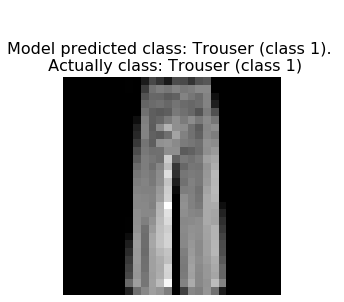

In [141]:
# Create the request

# HTTP request header
headers = {'content-type': 'application/json'}

# Build the url to the service using the constants we defined earlier, should be of the form:
#      http://localhost:8501/v1/models/fashion_mnist:predict
predict_service_url = 'http://localhost:' + REST_PORT + '/v1/models/' + MODEL_NAME + ':predict'

# Make request to the service.  Pass the headers and data.  Wait for the server's reponse.
json_response = requests.post(predict_service_url, data=data, headers=headers)
print(predict_service_url)
print(json_response)

# Parse the response.  For each images we pass we get a list of probabilities 
predictions = json.loads(json_response.text)['predictions']
# predictions[0] is the 10 probabilites for our first and only image.
# predictions[0] has values in the form [0.1, 0.05, ...., 0.6]

# The numpy argmax function returns the index of the highest value.  This is 
# the highest probabilty class predicted by our model. 
predicted_class = np.argmax(predictions[0])

# Display image, the actual class and the predicted class
show_image(image_index, 'Model predicted class: {} (class {}). \n Actually class: {} (class {})'.format(
  class_names[predicted_class], predicted_class, class_names[test_labels[image_index]], test_labels[image_index]))